Searches: DynestyStatic
=======================

This example illustrates how to use the MCMC ensamble sampler algorithm Emcee.

Information about Emcee can be found at the following links:

  - https://github.com/dfm/emcee
 - https://emcee.readthedocs.io/en/stable/

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autofit as af
import model as m
import analysis as a

import matplotlib.pyplot as plt
import numpy as np
from os import path

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


__Data__

This example fits a single 1D Gaussian, we therefore load and plot data containing one Gaussian.

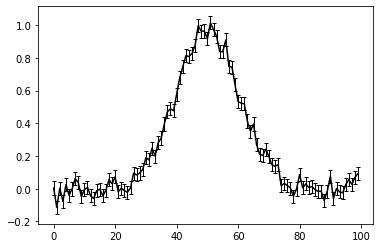

In [2]:
dataset_path = path.join("dataset", "example_1d", "gaussian_x1")
data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
noise_map = af.util.numpy_array_from_json(
    file_path=path.join(dataset_path, "noise_map.json")
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.show()
plt.close()

__Model + Analysis__

We create the model and analysis, which in this example is a single `Gaussian` and therefore has dimensionality N=3.

In [3]:
model = af.Model(m.Gaussian)

model.centre = af.UniformPrior(lower_limit=0.0, upper_limit=100.0)
model.intensity = af.UniformPrior(lower_limit=1e-2, upper_limit=1e2)
model.sigma = af.UniformPrior(lower_limit=0.0, upper_limit=30.0)

analysis = a.Analysis(data=data, noise_map=noise_map)

__Search__

We now create and run the `Emcee` object which acts as our non-linear search. 

We manually specify all of the Emcee settings, descriptions of which are provided at the following webpage:

 https://emcee.readthedocs.io/en/stable/user/sampler/
 https://emcee.readthedocs.io/en/stable/

2021-05-10 10:16:40,189 - root - INFO - Generating initial samples of model, which are subject to prior limits and other constraints.
2021-05-10 10:16:40,197 - root - INFO - No Emcee samples found, beginning new non-linear search.
100%|██████████| 500/500 [00:05<00:00, 85.67it/s]
2021-05-10 10:16:46,057 - root - INFO - 500 Iterations: Performing update (Visualization, outputting samples, etc.).
2021-05-10 10:16:46,950 - root - WARNING - Too few points to create valid contours
2021-05-10 10:16:46,983 - root - WARNING - Too few points to create valid contours
2021-05-10 10:16:47,003 - root - WARNING - Too few points to create valid contours
100%|██████████| 500/500 [00:05<00:00, 86.50it/s]
2021-05-10 10:16:55,320 - root - INFO - 1000 Iterations: Performing update (Visualization, outputting samples, etc.).
2021-05-10 10:16:56,922 - root - WARNING - Too few points to create valid contours
2021-05-10 10:16:56,949 - root - WARNING - Too few points to create valid contours
2021-05-10 10:16:56

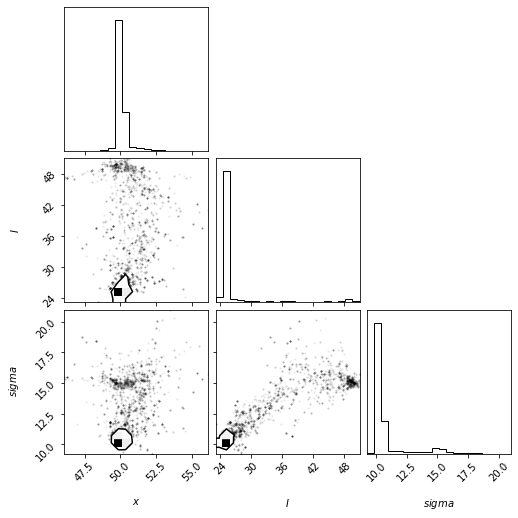

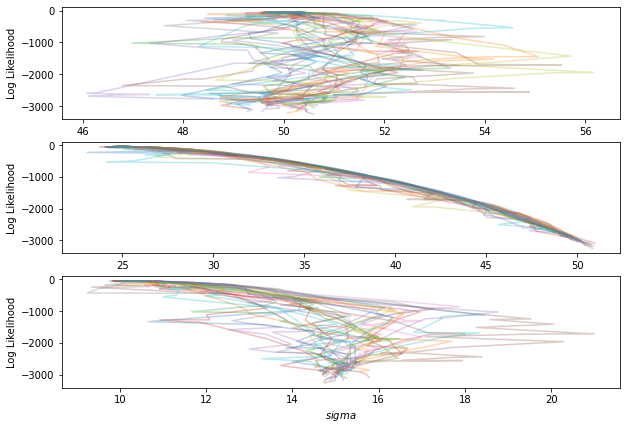

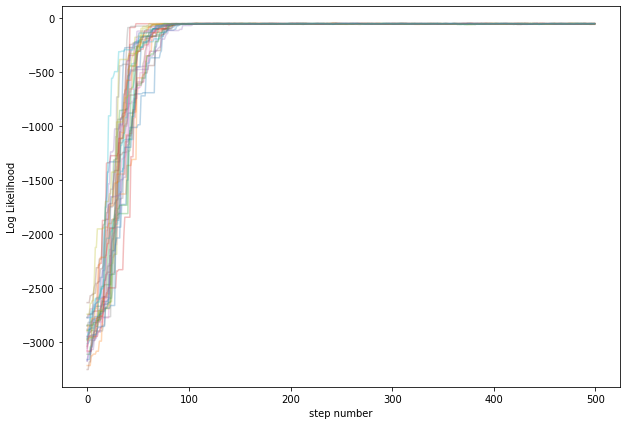

<Figure size 720x504 with 0 Axes>

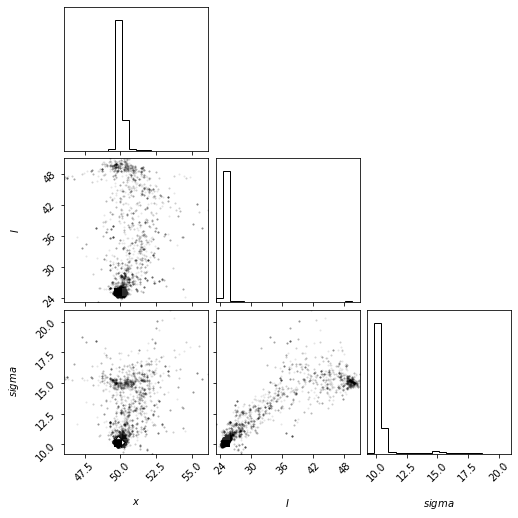

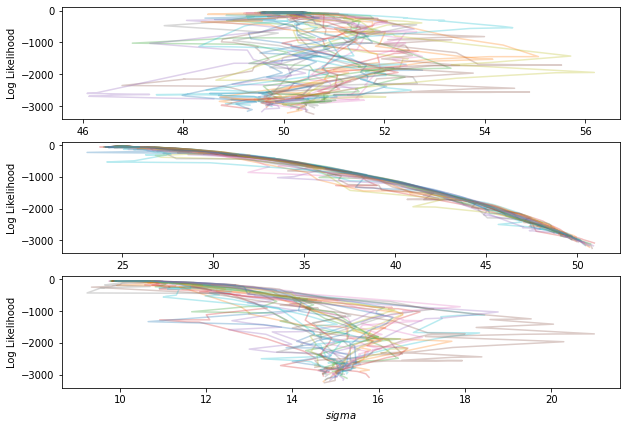

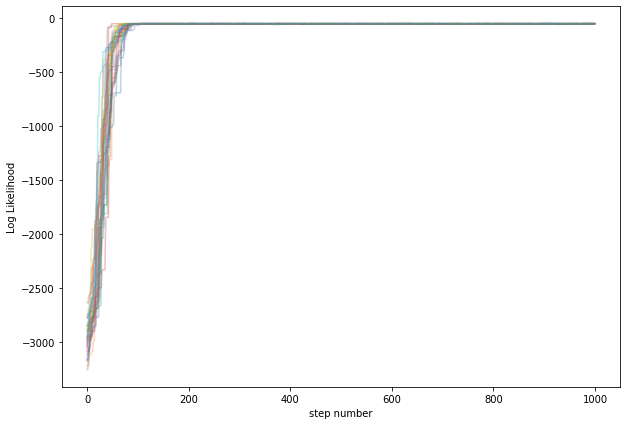

<Figure size 720x504 with 0 Axes>

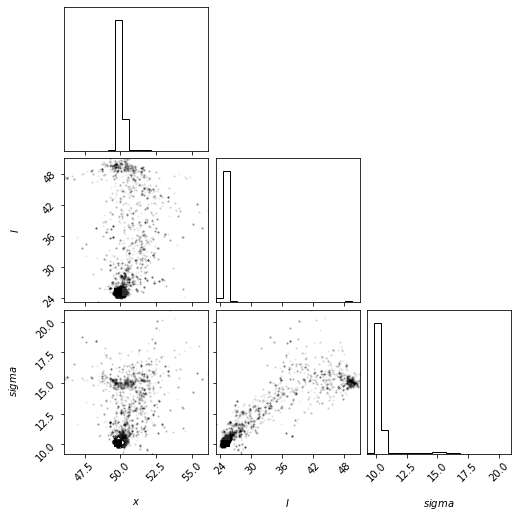

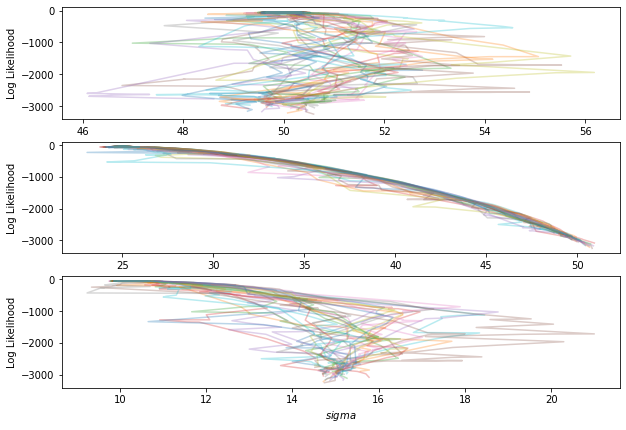

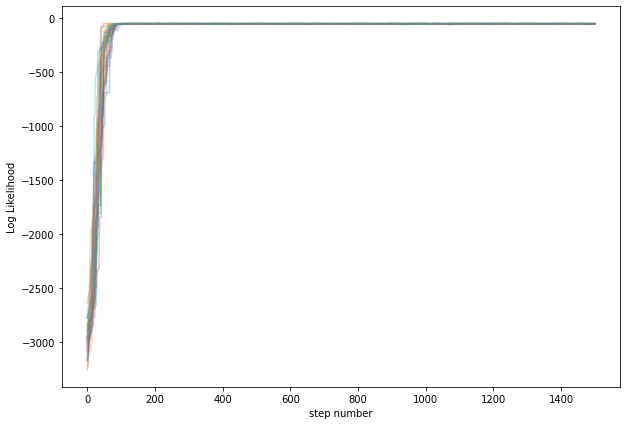

<Figure size 720x504 with 0 Axes>

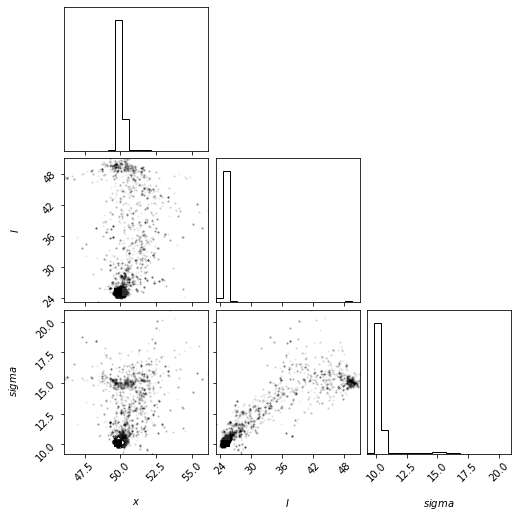

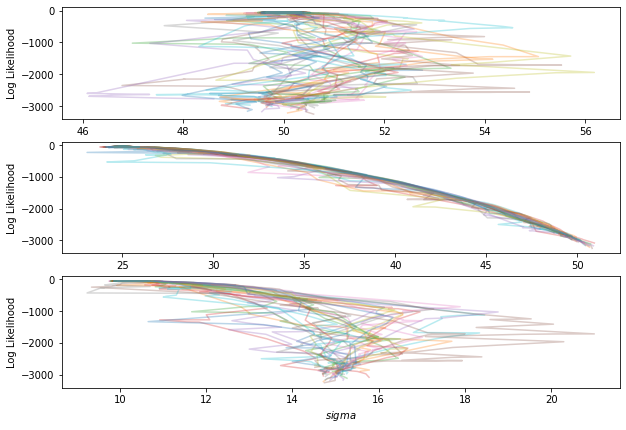

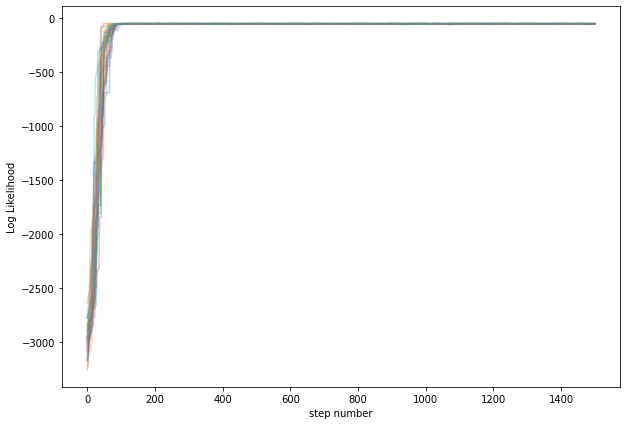

<Figure size 720x504 with 0 Axes>

In [4]:
emcee = af.Emcee(
    path_prefix="searches",
    name="Emcee",
    nwalkers=31,
    nsteps=10000,
    initializer=af.InitializerBall(lower_limit=0.49, upper_limit=0.51),
    auto_correlations_settings=af.AutoCorrelationsSettings(
        check_for_convergence=True,
        check_size=100,
        required_length=50,
        change_threshold=0.01,
    ),
    iterations_per_update=500,
    number_of_cores=1,
)

result = emcee.fit(model=model, analysis=analysis)

__Result__

The result object returned by the fit provides information on the results of the non-linear search. Lets use it to
compare the maximum log likelihood `Gaussian` to the data.

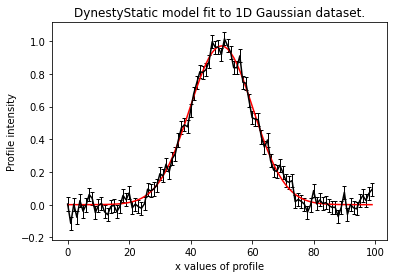

In [5]:
model_data = result.max_log_likelihood_instance.profile_from_xvalues(
    xvalues=np.arange(data.shape[0])
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.plot(range(data.shape[0]), model_data, color="r")
plt.title("DynestyStatic model fit to 1D Gaussian dataset.")
plt.xlabel("x values of profile")
plt.ylabel("Profile intensity")
plt.show()
plt.close()
